In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
# Import csv
df = pd.read_csv('C:/Users/Admin/group9/Resources/cleaned_wake_df.csv')
df.head()

,REAL_ESTATE_ID,Township,Deeded_Acreage,Total_sale_Price,Year_Built,HEATED_AREA,DESIGN_STYLE,BATH,Story_Height,PHYSICAL_CITY,PHYSICAL_ZIP_CODE,year,month,Quarter
0,19,1,0.21,34500,1964,1828,I,C,A,RALEIGH,27610.0,1974,1,1
1,20,16,0.46,35500,1970,1240,A,A,A,RALEIGH,27610.0,1983,5,2
2,22,10,0.46,37500,1900,2261,A,C,A,WENDELL,27591.0,2004,9,3
3,25,8,0.96,70000,1971,3770,A,J,A,RALEIGH,27613.0,1971,1,1
4,30,1,0.47,380000,1946,1789,A,C,A,RALEIGH,27607.0,2015,8,3


In [3]:
df.dtypes

REAL_ESTATE_ID         int64
Township               int64
Deeded_Acreage       float64
Total_sale_Price       int64
Year_Built             int64
HEATED_AREA            int64
DESIGN_STYLE          object
BATH                  object
Story_Height          object
PHYSICAL_CITY         object
PHYSICAL_ZIP_CODE    float64
year                   int64
month                  int64
Quarter                int64
dtype: object

In [4]:
# General overview of dataset
df.describe()

,REAL_ESTATE_ID,Township,Deeded_Acreage,Total_sale_Price,Year_Built,HEATED_AREA,PHYSICAL_ZIP_CODE,year,month,Quarter
count,323414.000000,323414.000000,323414.000000,3.234140e+05,323414.000000,323414.000000,323414.000000,323414.000000,323414.000000,323414.000000
mean,254368.649978,11.492335,0.432250,3.042200e+05,1996.182843,2289.883614,27571.600843,2011.126958,6.614973,2.532868
std,135661.033800,6.408540,1.754607,2.170023e+05,19.948279,1004.186978,63.981409,10.691870,3.308460,1.078409
min,19.000000,1.000000,0.000000,0.000000e+00,0.000000,220.000000,0.000000,1956.000000,1.000000,1.000000
25%,145265.250000,6.000000,0.130000,1.610000e+05,1986.000000,1552.000000,27526.000000,2005.000000,4.000000,2.000000
50%,253207.500000,12.000000,0.230000,2.610000e+05,2000.000000,2114.000000,27587.000000,2015.000000,7.000000,3.000000
75%,358790.750000,17.000000,0.410000,3.905000e+05,2009.000000,2818.000000,27610.000000,2019.000000,9.000000,3.000000
max,504024.000000,20.000000,307.910000,7.940000e+06,2024.000000,21993.000000,27713.000000,2023.000000,12.000000,4.000000


In [5]:
df.describe(percentiles=[0.01,0.05,0.1,0.25,0.75,0.9,0.95,0.99])

,REAL_ESTATE_ID,Township,Deeded_Acreage,Total_sale_Price,Year_Built,HEATED_AREA,PHYSICAL_ZIP_CODE,year,month,Quarter
count,323414.000000,323414.000000,323414.000000,3.234140e+05,323414.000000,323414.000000,323414.000000,323414.000000,323414.000000,323414.000000
mean,254368.649978,11.492335,0.432250,3.042200e+05,1996.182843,2289.883614,27571.600843,2011.126958,6.614973,2.532868
std,135661.033800,6.408540,1.754607,2.170023e+05,19.948279,1004.186978,63.981409,10.691870,3.308460,1.078409
min,19.000000,1.000000,0.000000,0.000000e+00,0.000000,220.000000,0.000000,1956.000000,1.000000,1.000000
1%,6350.390000,1.000000,0.000000,1.491300e+04,1928.000000,828.000000,27502.000000,1976.000000,1.000000,1.000000
5%,31251.650000,1.000000,0.030000,6.800000e+04,1959.000000,1084.000000,27511.000000,1989.000000,1.000000,1.000000
10%,63526.300000,2.000000,0.040000,1.020000e+05,1970.000000,1224.000000,27513.000000,1996.000000,2.000000,1.000000
25%,145265.250000,6.000000,0.130000,1.610000e+05,1986.000000,1552.000000,27526.000000,2005.000000,4.000000,2.000000
50%,253207.500000,12.000000,0.230000,2.610000e+05,2000.000000,2114.000000,27587.000000,2015.000000,7.000000,3.000000
75%,358790.750000,17.000000,0.410000,3.905000e+05,2009.000000,2818.000000,27610.000000,2019.000000,9.000000,3.000000


We can see in the Deeded_Acreage that we have a max of 307 acres. Heated area also have a max of 21993 sqft, and Max Sale price is almost 8million Dollars. These are all metrics that will skew the data greatly. The team is considering how to filter the data to have less outlier such as these.

Visualizations to check for outliers/other interesting features

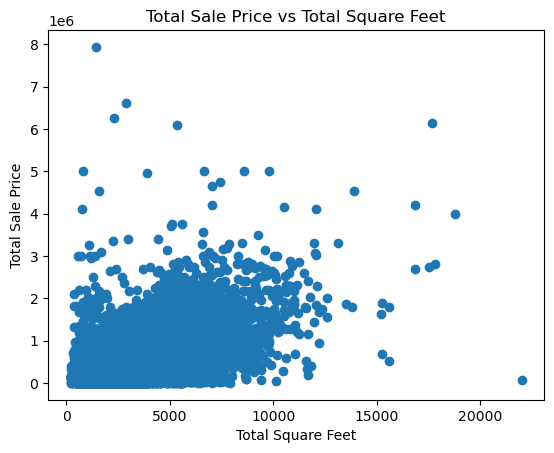

In [6]:
# Scatter plot total Heated Area x Total Sale Price
plt.scatter(df['HEATED_AREA'], df['Total_sale_Price'])
plt.xlabel('Total Square Feet')
plt.ylabel('Total Sale Price')
plt.title('Total Sale Price vs Total Square Feet')
plt.show()

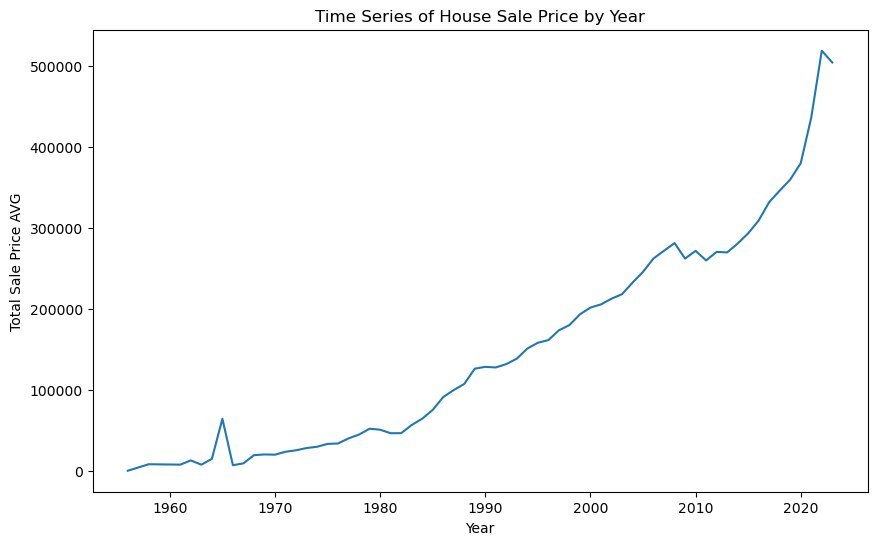

In [7]:
# Group data by Year and Avg Sale price
house_price_by_year = df.groupby('year')['Total_sale_Price'].mean()

# Create a line plot to visualize the time series
plt.figure(figsize=(10, 6))
house_price_by_year.plot(kind='line')
plt.xlabel('Year')
plt.ylabel('Total Sale Price AVG')
plt.title('Time Series of House Sale Price by Year')
plt.show()

In [ ]:
# HAVING ISSUES HERE
# Remove bottom 5% and Top 99% of Deeded acreage 3.06, bottom and top 1% (less than $15,000 and greater than $1,050,000)
# Houses between 1% and 99% square feet
cleaner_df = df.loc[(df['Deeded_Acreage'] > 0.03) | (df['Deeded_Acreage'] <3.06) | (df['Total_sale_Price'] > 15000)
                 | (df['Total_sale_Price'] < 1050000) | (df['HEATED_AREA'] > 828)  | (df['HEATED_AREA'] < 5498)]
cleaner_df.head(10)

In [ ]:
cleaner_df.describe()

In [ ]:
new_df.describe(percentiles=[0.01,0.05,0.1,0.25,0.75,0.9,0.95,0.99])